<a href="https://colab.research.google.com/github/x3gan/elte-msc/blob/main/Deep%20Network%20Development/Autograd_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Autograd**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Linear Regression</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://i.ibb.co/QqX9V4N/News-Image-2023-11-22-T133344-154-1.png" alt="News-Image-2023-11-22-T133344-154-1" border="0">

PyTorch Autograd is a powerful automatic differentiation engine that dynamically builds a computation graph as operations are executed, allowing it to automatically compute gradients for tensor operations during backpropagation. This feature simplifies model training and debugging by enabling seamless gradient calculation for complex neural network architectures without the need for manual derivative computations.

In [ ]:
# @title Roadmap Generator
%%capture flowchart_output
from graphviz import Digraph

def create_autograd_flowchart(output_filename='autograd_flowchart'):
    dot = Digraph(name='PyTorchAutograd', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    # Nodes (with difficulties: green = easy, yellow = moderate, red = difficult)
    dot.node('Import', 'Import Libraries\n(Easy)', fillcolor='#A0E7A0')
    dot.node('SimpleComp', 'Define Simple Function\n(y = 3x² + 4x + 2)\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Backward', 'Compute Gradient with backward()\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Accumulation', 'Demonstrate Gradient Accumulation\n(Moderate)', fillcolor='#F6D49A')
    dot.node('Detach', 'Convert Tensor to NumPy using detach()\n(Moderate)', fillcolor='#F6D49A')
    dot.node('ComplexGraph', 'Build & Evaluate Complex Graph\n(Moderate)', fillcolor='#F6D49A')

    # Define connections
    dot.edge('Import', 'SimpleComp')
    dot.edge('SimpleComp', 'Backward')
    dot.edge('Backward', 'Accumulation')
    dot.edge('Accumulation', 'Detach')
    dot.edge('Detach', 'ComplexGraph')

    dot.render(output_filename, view=False)

create_autograd_flowchart('autograd_flowchart')


## **Necessary Imports**

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython.display import Image as IMG

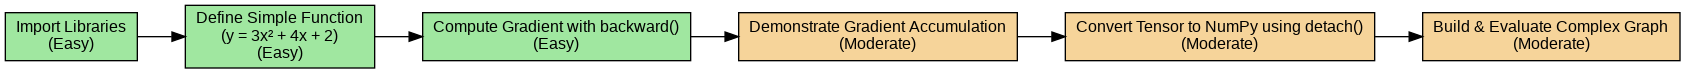

In [ ]:
IMG('autograd_flowchart.png')

## **Computation graphs and Autograd**


$ y = 3x^2 + 4x + 2$

`x` = `5`  
$ y = 3*5^2 + 4*5 + 2 $\
$ y = 3*25 + 20 + 2$\
$ y = 75 + 20 + 2 $\
$ y = 97 $

In [ ]:
#set requires_grad=true if you need the grad later
x = torch.tensor(5., requires_grad=True)

In [ ]:
y = 3*x**2 + 4*x + 2
%whos

Variable                    Type          Data/Info
---------------------------------------------------
Digraph                     type          <class 'graphviz.graphs.Digraph'>
IMG                         type          <class 'IPython.core.display.Image'>
create_autograd_flowchart   function      <function create_autograd<...>wchart at 0x78273374a160>
flowchart_output            CapturedIO    
np                          module        <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt                         module        <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
torch                       module        <module 'torch' from '/us<...>kages/torch/__init__.py'>
x                           Tensor        tensor(5., requires_grad=True)
y                           Tensor        tensor(97., grad_fn=<AddBackward0>)


The `backward()` method is used to compute the gradient during the backward pass in a neural network.

The derivative of `y` with respect to the variable `x`.\
$\frac{dy}{dx} = 2*3x + 4 = 6x + 4$\
`x` = `5`

$6x + 4 = 6*5 + 4 = 30 + 4 = 34$


In [ ]:
#y.backward()
x.grad

PyTorch accumulates the derivatives (gradients) on each subsequent backward passes. This is convinient during training **R**ecurrent **N**eural **N**etworks \\
To set it zero in each iteration you can use `grad.zero_` function on a `Tensor`.


In [ ]:
x = torch.tensor(5., requires_grad=True)

for i in range(3):
    y = 3*x**2 + 4*x + 2
    y.backward()
    print(x.grad)
    #x.grad.zero_() ## pytorch accumulates the derivatives by default


tensor(34.)
tensor(68.)
tensor(102.)


to convert a `torch.tensor` to `numpy.ndarray` you have to explicitly remove the computational graph from the tensor using `detach()` command

In [ ]:
x = torch.tensor(5., requires_grad=False) # torch.tensor can not converted to numpy if grad is True
np_x = x.numpy()
np_x = x.detach().numpy()
print(f'np_x type: {type(np_x)}')
print(f'np_x: {np_x}')

np_x type: <class 'numpy.ndarray'>
np_x: 5.0


A bit more complex calculation of gradients

$e = \underbrace{(a * b)}_\text{u} + \underbrace{c * \underbrace{log(d)}_\text{w}}_\text{v}$

digraph G {
	e
	u
	v
	w
	a [color=transparent]
	b [color=transparent]
	c [color=transparent]
	d [color=transparent]
	e -> u [dir=back]
	e -> v [dir=back]
	v -> w [dir=back]
	v -> c [dir=back]
	u -> a [dir=back]
	u -> b [dir=back]
	w -> d [dir=back]
}



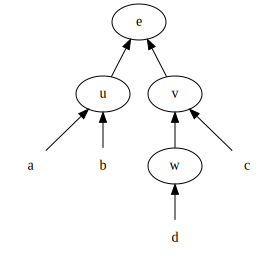

In [ ]:
# conda install python-graphviz
import graphviz #graphviz, python-graphviz, (pydot)
g = graphviz.Digraph('G', filename='hello.gv')
g.node('e')
g.node('u')
g.node('v')
g.node('w')
g.node('a', color='transparent')
g.node('b', color='transparent')
g.node('c', color='transparent')
g.node('d', color='transparent')
g.edge('e', 'u', dir='back')
g.edge('e', 'v', dir='back')
g.edge('v', 'w', dir='back')
g.edge('v', 'c', dir='back')
g.edge('u', 'a', dir='back')
g.edge('u', 'b', dir='back')
g.edge('w', 'd', dir='back')
print(g.source)
g

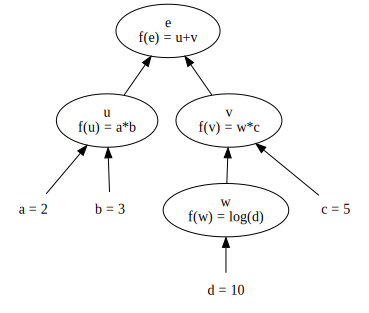

In [ ]:
g = graphviz.Digraph('G', filename='hello.gv')
g.node('e\nf(e) = u+v')
g.node('u\nf(u) = a*b')
g.node('v\nf(v) = w*c')
g.node('w\nf(w) = log(d)')
g.node('a = 2', color='transparent')
g.node('b = 3', color='transparent')
g.node('c = 5', color='transparent')
g.node('d = 10', color='transparent')
g.edge('e\nf(e) = u+v', 'u\nf(u) = a*b', dir='back')
g.edge('e\nf(e) = u+v', 'v\nf(v) = w*c', dir='back')
g.edge('v\nf(v) = w*c', 'w\nf(w) = log(d)', dir='back')
g.edge('v\nf(v) = w*c', 'c = 5', dir='back')
g.edge('u\nf(u) = a*b', 'a = 2', dir='back')
g.edge('u\nf(u) = a*b', 'b = 3', dir='back')
g.edge('w\nf(w) = log(d)', 'd = 10', dir='back')
g

In case of forward-pass (of backpropagation) we have to replace the variables in the equation:

$e = \underbrace{(a * b)}_\text{u} + \underbrace{c * \underbrace{log(d)}_\text{w}}_\text{v} = (2 * 3) + (5 * \underbrace{log(10)}_\text{1}) = 11$

To calculate the backward-pass simply let `torch` do the math and calculate the derivative of **`e`** with respect to the inputs leading to **`e`**

$\frac{\partial e}{\partial a} = ?$ \\
$\frac{\partial e}{\partial b} = ?$ \\
$\frac{\partial e}{\partial c} = ?$ \\
$\frac{\partial e}{\partial d} = ?$

In [ ]:
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
c = torch.tensor(5., requires_grad=True)
d = torch.tensor(10., requires_grad=True)

# e = (a * b) + c * torch.log10(d)
u = a*b
w = torch.log10(d)
v = c * w
e = u + v
e

u.retain_grad()
w.retain_grad()
v.retain_grad()

e.retain_grad()

In [ ]:
e.backward()
print(f"a:\n\t is_leaf: {a.is_leaf} \n\t grad_fn: {a.grad_fn} \n\t grad: {a.grad}")
print(f"b:\n\t is_leaf: {b.is_leaf} \n\t grad_fn: {b.grad_fn} \n\t grad: {b.grad}")
print(f"c:\n\t is_leaf: {c.is_leaf} \n\t grad_fn: {c.grad_fn} \n\t grad: {c.grad}")
print(f"d:\n\t is_leaf: {d.is_leaf} \n\t grad_fn: {d.grad_fn} \n\t grad: {d.grad}")
print()
print(f"u:\n\t is_leaf: {u.is_leaf} \n\t grad_fn: {u.grad_fn} \n\t grad: {u.grad}")
print(f"w:\n\t is_leaf: {w.is_leaf} \n\t grad_fn: {w.grad_fn} \n\t grad: {w.grad}")
print(f"v:\n\t is_leaf: {v.is_leaf} \n\t grad_fn: {v.grad_fn} \n\t grad: {v.grad}")
print()
print(f"e:\n\t is_leaf: {e.is_leaf} \n\t grad_fn: {e.grad_fn} \n\t grad: {e.grad}")

a:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 3.0
b:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 2.0
c:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 1.0
d:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 0.21714723110198975

u:
	 is_leaf: False 
	 grad_fn: <MulBackward0 object at 0x7826546384c0> 
	 grad: 1.0
w:
	 is_leaf: False 
	 grad_fn: <Log10Backward0 object at 0x78265463b610> 
	 grad: 5.0
v:
	 is_leaf: False 
	 grad_fn: <MulBackward0 object at 0x7826546384c0> 
	 grad: 1.0

e:
	 is_leaf: False 
	 grad_fn: <AddBackward0 object at 0x7826546384c0> 
	 grad: 1.0


The partial derivatives of `u`, `w` and `v` variables:

In [ ]:
from IPython.display import display, Math
display(Math(fr'\frac{{\partial e}}{{\partial a}} = {a.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial b}} = {b.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial c}} = {c.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial d}} = {d.grad.item()}'))
print()
print()
display(Math(fr'\frac{{\partial e}}{{\partial u}} = {u.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial w}} = {w.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial v}} = {v.grad.item()}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Lecture example

$J(\theta) = (\hat{y} - y)^2,\quad \hat{y} = ReLU(\theta_0 + x\theta_1),\quad ReLU(x) = \begin{cases}0, x \le 0 \\ x, x > 0\end{cases}$

### 1. Create the directed acyclic graph of the operations

![Computational graph of ReLU regression loss function. Shows inputs θ0, θ1, x, y flowing through multiplication, addition, ReLU, subtraction, squaring, and output J. Substitution values: x=2, y=1, θ0=5, θ1=-3, α=0.1.](https://gist.githubusercontent.com/CuriousPercibal/6173b113e108d79a09994cef0d3a1078/raw/3d679ff6c1529f3f5403d7c8b16e132c25d03a95/graph.svg)

### 2. Substitution

$$ x = 2,\; y = 1, \qquad \theta_0 = 5,\;\theta_1 = -3, \qquad \alpha = 0.1 $$

In [ ]:
import torch.nn.functional as F

In [ ]:
x = torch.tensor([2.], requires_grad=False)
y = torch.tensor([1.], requires_grad=False)

theta_0 = torch.tensor([5.], requires_grad=True)
theta_1 = torch.tensor([-3.], requires_grad=True)

alpha = 0.1

\\
$J(\theta) = (ReLU(\theta_0 + \theta_1x) - y)^2$



In [ ]:
model = F.relu(theta_0 + theta_1 * x)
J = (model - y)**2

In [ ]:
print(f'model prediction: {model.detach().numpy()}, actual: {y.numpy()}')
print(f'loss: {J.detach().numpy()}')

model prediction: [0.], actual: [1.]
loss: [1.]


In [ ]:
print(f'theta_0.grad = {theta_0.grad}')
print(f'theta_1.grad = {theta_1.grad}')

theta_0.grad = None
theta_1.grad = None


In [ ]:
J.backward()

In [ ]:
print(f'theta_0.grad = {theta_0.grad}')
print(f'theta_1.grad = {theta_1.grad}')

theta_0.grad = tensor([0.])
theta_1.grad = tensor([0.])


## Substitution with other values

$$ x = 2,\; y = 1, \qquad \theta_0 = 5,\;\theta_1 = -1, \qquad \alpha = 0.1 $$

In [ ]:
x = torch.tensor([2.], requires_grad=False)
y = torch.tensor([1.], requires_grad=False)

theta_0 = torch.tensor([5.], requires_grad=True)
theta_1 = torch.tensor([-1.], requires_grad=True)

alpha = 0.1

In [ ]:
model = F.relu(theta_0 + theta_1 * x)
J = (model - y)**2

In [ ]:
print(f'model prediction: {model.detach().numpy()}, actual: {y.numpy()}')
print(f'loss: {J.detach().numpy()}')

model prediction: [3.], actual: [1.]
loss: [4.]


In [ ]:
J.backward()

In [ ]:
print(f'theta_0.grad = {theta_0.grad}')
print(f'theta_1.grad = {theta_1.grad}')

theta_0.grad = tensor([4.])
theta_1.grad = tensor([8.])


## 3. Update parameters

$$\theta_0 = \theta_0 - \alpha * \frac{\partial J}{\partial \theta_0}$$

$$\theta_1 = \theta_1 - \alpha * \frac{\partial J}{\partial \theta_1}$$

In [ ]:
theta_0 = theta_0 - alpha * theta_0.grad
theta_1 = theta_1 - alpha * theta_1.grad

In [ ]:
print(f'theta_0: {theta_0.detach().numpy()}')
print(f'theta_1: {theta_1.detach().numpy()}')

theta_0: [4.6]
theta_1: [-1.8]



### **HOMEWORK (Optional)**

- **Exercise 1: Analytical vs. Autograd Gradients**  
  Implement the function $f(x) = 3x^2 + 4x + 2$ using PyTorch with $x = 5$ (and with `requires_grad=True`). Use autograd to compute the gradient, and compare the result with the analytical derivative $f'(x) = 6x + 4$.

- **Exercise 2: Gradient Accumulation and Resetting**  
  Create a tensor $x$ with `requires_grad=True`. In a loop, compute a simple function (e.g., $f(x) = x^2$) several times and call `backward()` without resetting the gradients. Print the accumulated gradients. Then, reset the gradients using `x.grad.zero_()` and observe the difference in gradient accumulation.

- **Exercise 3: Detaching Tensors**  
  Build a computation graph by performing several operations on a tensor. Detach an intermediate tensor using `.detach()`, continue the computation from that point, and then compute the gradients. Verify that the detached tensor does not contribute to the gradients during backpropagation.

- **Exercise 4: Custom Autograd Function**  
  Create a custom function by subclassing `torch.autograd.Function` to implement a non-standard operation (for example, a custom squaring function). Define both the `forward` and `backward` methods, and compare the outputs and gradients of your custom function with those of a built-in PyTorch operation.

- **Exercise 5: Inspecting the Computation Graph**  
  Construct a complex computation graph by combining multiple operations (e.g., addition, multiplication, logarithm). Print the `grad_fn` attribute of the final output to trace the chain of operations, and explain how PyTorch’s autograd mechanism builds and utilizes the computation graph.

- **Exercise 6: Numerical Gradient Approximation**  
  For a simple function such as $f(x) = \sin(x)$, compute the gradient at a specific point using PyTorch autograd. Then, approximate the gradient using finite differences (a numerical method) and compare the results.